In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [4]:
sft_model_path =  "ckpts/sft_lama_GPT2_commit/checkpoint_10000/hf_model"
sft2_model_path =  "ckpts/sft2_lama_GPT2/checkpoint_10000/hf_model"
ppo_model_path = "ckpts/ppo_lama_GPT2_3_commit30_hedge25.5_6.5_idk11_cr0.0005/checkpoint_80000/hf_model"

In [5]:
ppo_generation_categories = np.load(ppo_model_path+"/generation_categories_trex_ood_idxs_128+.npy")
sft_generation_categories = np.load(sft_model_path+"/generation_categories_trex_ood_idxs_128+.npy")
sft2_generation_categories = np.load(sft2_model_path+"/generation_categories_trex_ood_idxs_128+.npy")


In [6]:
num_commit_correct_ppo = len(np.where(ppo_generation_categories[:, 1]==1)[0])
num_commit_wrong_ppo = len(np.where(ppo_generation_categories[:, 2]==1)[0])
num_dont_know_ppo = len(np.where(ppo_generation_categories[:, 3]==1)[0])
num_wrong_ppo = len(np.where(ppo_generation_categories[:, 4]==1)[0])
num_hedge_correct_ppo = len(np.where(ppo_generation_categories[:, 5]==1)[0])
num_hedge_wrong_ppo = len(np.where(ppo_generation_categories[:, 6]==1)[0])

num_commit_correct_sft = len(np.where(sft_generation_categories[:, 1]==1)[0])
num_commit_wrong_sft = len(np.where(sft_generation_categories[:, 2]==1)[0])
num_dont_know_sft = len(np.where(sft_generation_categories[:, 3]==1)[0])
num_wrong_sft = len(np.where(sft_generation_categories[:, 4]==1)[0])
num_hedge_correct_sft = len(np.where(sft_generation_categories[:, 5]==1)[0])
num_hedge_wrong_sft = len(np.where(sft_generation_categories[:, 6]==1)[0])


num_commit_correct_sft2 = len(np.where(sft2_generation_categories[:, 1]==1)[0])
num_commit_wrong_sft2 = len(np.where(sft2_generation_categories[:, 2]==1)[0])
num_dont_know_sft2 = len(np.where(sft2_generation_categories[:, 3]==1)[0])
num_wrong_sft2 = len(np.where(sft2_generation_categories[:, 4]==1)[0])
num_hedge_correct_sft2 = len(np.where(sft2_generation_categories[:, 5]==1)[0])
num_hedge_wrong_sft2 = len(np.where(sft2_generation_categories[:, 6]==1)[0])


In [29]:
num_commit_correct_ppo/(num_commit_correct_ppo+num_commit_wrong_ppo)

0.06043956043956044

In [30]:
num_hedge_correct_ppo/(num_hedge_correct_ppo+num_hedge_wrong_ppo)

0.03597848016139879

In [35]:
(sft_generation_categories[np.where(ppo_generation_categories[:, 3]==1)[0], 1]==1).sum()/num_dont_know_ppo

0.05071315372424723

In [31]:
num_commit_correct_sft/(num_commit_correct_sft+num_commit_wrong_sft)

0.04650803461063041

In [32]:
num_commit_correct_sft2/(num_commit_correct_sft2+num_commit_wrong_sft2)

0.03950987746936734

In [34]:
num_hedge_correct_sft2/(num_hedge_correct_sft2+num_hedge_wrong_sft2)

0.06355591311343524

In [18]:
log_liks = np.load(sft_model_path+"/generated_answer_log_probs_mean_trex_ood_idxs_128+.npy")

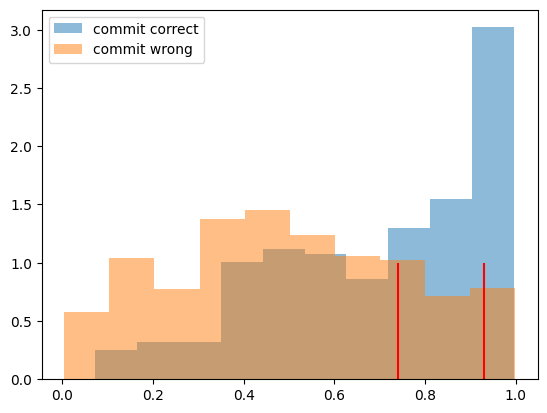

In [24]:
plt.hist(np.e**np.array(log_liks)[np.where(sft_generation_categories[:, 1]==1)[0]], density=True, alpha=0.5, label="commit correct")

plt.hist(np.e**np.array(log_liks)[np.where(sft_generation_categories[:, 2]==1)[0]], density=True, alpha=0.5, label="commit wrong")

plt.legend()

best_threshold1 = .74
best_threshold2 = .93

plt.vlines(best_threshold1, 0, 1, color="red")
plt.vlines(best_threshold2, 0, 1, color="red")


In [27]:
len(np.where(np.e**np.array(log_liks) < best_threshold1)[0])/len(log_liks)

0.7852760736196319

In [28]:
len(np.where(np.e**np.array(log_liks) > best_threshold2)[0])/len(log_liks)

0.06718539578033818

In [16]:
np.where(sft_generation_categories[:, 1]==1)[0]

array([ 104,  110,  120,  159,  175,  211,  231,  233,  333,  371,  372,
        435,  448,  461,  477,  493,  494,  508,  565,  601,  644,  653,
        678,  681,  684,  688,  820,  831,  864,  912,  941,  946,  987,
        997, 1003, 1006, 1022, 1025, 1027, 1030, 1044, 1075, 1077, 1080,
       1084, 1086, 1096, 1110, 1154, 1163, 1197, 1200, 1225, 1239, 1290,
       1297, 1298, 1299, 1340, 1373, 1400, 1417, 1420, 1428, 1445, 1473,
       1479, 1523, 1565, 1581, 1589, 1600, 1645, 1737, 1757, 1768, 1776,
       1809, 1813, 1852, 1863, 1868, 1870, 1890, 1955, 1979, 1981, 1995,
       1999, 2020, 2026, 2027, 2034, 2057, 2081, 2089, 2125, 2126, 2128,
       2173, 2197, 2224, 2268, 2302, 2303, 2320, 2336, 2356, 2380, 2395,
       2396, 2463, 2515, 2540, 2549, 2552, 2566, 2588, 2640, 2641, 2643,
       2658, 2663, 2703, 2765, 2769, 2796, 2803, 2810, 2823, 2850, 2858,
       2861, 2905, 2916, 2978, 3055, 3056, 3137, 3142, 3153, 3171, 3173,
       3184, 3186, 3192, 3194, 3204, 3206, 3215, 32

In [17]:
log_liks

(6683,)

In [28]:
print("num_commit_correct_sft", num_commit_correct_sft/len(sft_generation_categories))
print("num_commit_wrong_sft", num_commit_wrong_sft/len(sft_generation_categories))
print("num_dont_know_sft", num_dont_know_sft/len(sft_generation_categories))
print("num_wrong_sft", num_wrong_sft/len(sft_generation_categories))
print("num_hedge_correct_sft", num_hedge_correct_sft/len(sft_generation_categories))
print("num_hedge_wrong_sft", num_hedge_wrong_sft/len(sft_generation_categories))


num_commit_correct_sft 0.04503965285051623
num_commit_wrong_sft 0.9233877001346701
num_dont_know_sft 0.0
num_wrong_sft 0.03157264701481371
num_hedge_correct_sft 0.0
num_hedge_wrong_sft 0.0


In [32]:
print("num_commit_correct_sft2", num_commit_correct_sft2/len(sft2_generation_categories))
print("num_commit_wrong_sft2", num_commit_wrong_sft2/len(sft2_generation_categories))
print("num_dont_know_sft2", num_dont_know_sft2/len(sft2_generation_categories))
print("num_wrong_sft2", num_wrong_sft2/len(sft2_generation_categories))
print("num_hedge_correct_sft2", num_hedge_correct_sft2/len(sft2_generation_categories))
print("num_hedge_wrong_sft2", num_hedge_wrong_sft2/len(sft2_generation_categories))


num_commit_correct_sft2 0.02364207691156666
num_commit_wrong_sft2 0.574741882388149
num_dont_know_sft2 0.0014963339817447255
num_wrong_sft2 0.02813107885680084
num_hedge_correct_sft2 0.02364207691156666
num_hedge_wrong_sft2 0.3483465509501721


In [33]:
print(np.array([num_commit_correct_ppo, num_commit_wrong_ppo, num_dont_know_ppo, num_wrong_ppo, num_hedge_correct_ppo, num_hedge_wrong_ppo])/len(ppo_generation_categories))

[0.02139758 0.33263504 0.18883735 0.01212031 0.01601077 0.42899895]


In [4]:
sft_generation_categories = np.load(sft_model_path+"/generation_categories.npy")
ppo_generation_categories = np.load(ppo_model_path+"/generation_categories.npy")
ood_idxs = np.where(sft_generation_categories[:, 0]==3)[0]
test_idxs = np.where(sft_generation_categories[:, 0]==2)[0]

In [6]:
len(sft_generation_categories)

6266

In [10]:
# metrics = np.stack([np.array(kwargs["split"]), commit_correct, commit_wrong, dont_know, wrong, hedge_correct, hedge_wrong], axis=1)

num_commit_correct_ppo = len(np.where(ppo_generation_categories[ood_idxs, 1]==1)[0])
num_commit_wrong_ppo = len(np.where(ppo_generation_categories[ood_idxs, 2]==1)[0])
num_dont_know_ppo = len(np.where(ppo_generation_categories[ood_idxs, 3]==1)[0])
num_wrong_ppo = len(np.where(ppo_generation_categories[ood_idxs, 4]==1)[0])
num_hedge_correct_ppo = len(np.where(ppo_generation_categories[ood_idxs, 5]==1)[0])
num_hedge_wrong_ppo = len(np.where(ppo_generation_categories[ood_idxs, 6]==1)[0])

num_commit_correct_sft = len(np.where(sft_generation_categories[ood_idxs, 1]==1)[0])
num_commit_wrong_sft = len(np.where(sft_generation_categories[ood_idxs, 2]==1)[0])
num_dont_know_sft = len(np.where(sft_generation_categories[ood_idxs, 3]==1)[0])
num_wrong_sft = len(np.where(sft_generation_categories[ood_idxs, 4]==1)[0])
num_hedge_correct_sft = len(np.where(sft_generation_categories[ood_idxs, 5]==1)[0])
num_hedge_wrong_sft = len(np.where(sft_generation_categories[ood_idxs, 6]==1)[0])

total = len(ood_idxs)

In [11]:
np.array([num_commit_correct_ppo, num_commit_wrong_ppo, num_dont_know_ppo, num_wrong_ppo, num_hedge_correct_ppo, num_hedge_wrong_ppo])/total

array([0.1768752 , 0.05076973, 0.09564363, 0.00262037, 0.22993777,
       0.44415329])

In [24]:
(num_dont_know_ppo)/total

0.09564362921716345

In [18]:
num_commit_correct_ppo/(num_commit_correct_ppo+num_commit_wrong_ppo)

0.7769784172661871

In [19]:
num_hedge_correct_ppo/(num_hedge_correct_ppo+num_hedge_wrong_ppo)

0.34110787172011664

In [20]:
(num_commit_correct_ppo+num_hedge_correct_ppo)/total

0.4068129708483459

In [21]:
ppo_idk_idxs  = np.where(ppo_generation_categories[ood_idxs, 3]==1)[0]
np.sum(sft_generation_categories[ood_idxs][ppo_idk_idxs, 1])/len(sft_generation_categories[ood_idxs][ppo_idk_idxs, 1])

0.2602739726027397

In [13]:
(30*num_commit_correct_ppo+25.5*num_hedge_correct_ppo+6.5*num_hedge_wrong_ppo+11*num_dont_know_ppo)/total

15.108745496233214

In [12]:
np.array([num_commit_correct_sft, num_commit_wrong_sft, num_dont_know_sft, num_wrong_sft, num_hedge_correct_sft, num_hedge_wrong_sft])/total

array([3.96331477e-01, 6.03340976e-01, 0.00000000e+00, 3.27546675e-04,
       0.00000000e+00, 0.00000000e+00])

In [17]:
num_commit_correct_sft*25.5/total+(total-num_commit_correct_sft)*6.5/total

14.030298067474614

In [25]:
num_commit_correct_sft*30/total

11.889944317065181

In [6]:
sft_generated_answer_log_probs_mean = np.load(sft_model_path+"/generated_answer_log_probs_mean.npy")


In [15]:
correct_sft_generated_answer_probs_means = np.e**sft_generated_answer_log_probs_mean[test_idxs][np.where(sft_generation_categories[test_idxs, 1]==1)[0]]
wrong_sft_generated_answer_probs_means = np.e**sft_generated_answer_log_probs_mean[test_idxs][np.where(sft_generation_categories[test_idxs, 1]==0)[0]]

In [25]:
# threshold1s = np.array([(0.8-0.5)/10*_+0.5 for _ in range(10)])
# threshold2s = np.array([(0.99-0.81)/10*_+0.81 for _ in range(10)])

threshold1s = np.array([(0.88-0.65)/10*_+0.65 for _ in range(10)])
threshold2s = np.array([(0.99-0.89)/10*_+0.89 for _ in range(10)])

rewards_all = np.zeros((10, 10))

for i in range(10):
    for j in range(10):
        threshold1 = threshold1s[i]
        threshold2 = threshold2s[j]
        print(threshold1, threshold2)
        commit_correct = (np.where(correct_sft_generated_answer_probs_means>threshold2)[0].shape[0])
        commit_wrong = (np.where(wrong_sft_generated_answer_probs_means>threshold2)[0].shape[0])

        hedge_correct = (np.where(np.logical_and(correct_sft_generated_answer_probs_means>threshold1, correct_sft_generated_answer_probs_means<threshold2))[0].shape[0])
        hedge_wrong = (np.where(np.logical_and(wrong_sft_generated_answer_probs_means>threshold1, wrong_sft_generated_answer_probs_means<threshold2))[0].shape[0])

        dont_know_correct = (np.where(correct_sft_generated_answer_probs_means<threshold1)[0].shape[0])
        dont_know_wrong = (np.where(wrong_sft_generated_answer_probs_means<threshold1)[0].shape[0])

        total = commit_correct+commit_wrong+hedge_correct+hedge_wrong+dont_know_correct+dont_know_wrong

        commmit_correct_percentage = commit_correct/(commit_correct+commit_wrong)
        hedge_correct_percentage = hedge_correct/(hedge_correct+hedge_wrong)
        dont_know_correct_percentage = dont_know_correct/(dont_know_correct+dont_know_wrong)

        # print([commmit_correct_percentage, hedge_correct_percentage, dont_know_correct_percentage])

        reward = (30*commit_correct+25.5*hedge_correct+6.5*hedge_wrong+11*(dont_know_correct+dont_know_wrong))/total
        print(reward)
        rewards_all[i, j] = reward

print(reward)

0.65 0.89
14.650482415188298
0.65 0.9
14.659041394335512
0.65 0.91
14.652505446623094
0.65 0.92
14.660753190164955
0.65 0.93
14.678182384064737
0.65 0.94
14.668689698101463
0.65 0.95
14.659041394335512
0.65 0.96
14.639744786803611
0.65 0.97
14.588235294117647
0.65 0.98
14.535792094615624
0.673 0.89
14.711173358232182
0.673 0.9
14.719732337379396
0.673 0.91
14.713196389666978
0.673 0.92
14.72144413320884
0.673 0.93
14.738873327108621
0.673 0.94
14.729380641145347
0.673 0.95
14.719732337379396
0.673 0.96
14.700435729847495
0.673 0.97
14.64892623716153
0.673 0.98
14.596483037659508
0.6960000000000001 0.89
14.792561469032057
0.6960000000000001 0.9
14.801120448179272
0.6960000000000001 0.91
14.794584500466854
0.6960000000000001 0.92
14.802832244008714
0.6960000000000001 0.93
14.820261437908497
0.6960000000000001 0.94
14.810768751945222
0.6960000000000001 0.95
14.801120448179272
0.6960000000000001 0.96
14.78182384064737
0.6960000000000001 0.97
14.730314347961407
0.6960000000000001 0.98
14.67

In [26]:
rewards_all

array([[14.65048242, 14.65904139, 14.65250545, 14.66075319, 14.67818238,
        14.6686897 , 14.65904139, 14.63974479, 14.58823529, 14.53579209],
       [14.71117336, 14.71973234, 14.71319639, 14.72144413, 14.73887333,
        14.72938064, 14.71973234, 14.70043573, 14.64892624, 14.59648304],
       [14.79256147, 14.80112045, 14.7945845 , 14.80283224, 14.82026144,
        14.81076875, 14.80112045, 14.78182384, 14.73031435, 14.67787115],
       [14.82835356, 14.83691254, 14.8303766 , 14.83862434, 14.85605353,
        14.84656085, 14.83691254, 14.81761594, 14.76610644, 14.71366324],
       [14.83769063, 14.84624961, 14.83971366, 14.84796141, 14.8653906 ,
        14.85589791, 14.84624961, 14.826953  , 14.77544351, 14.72300031],
       [14.83239963, 14.84095861, 14.83442266, 14.8426704 , 14.8600996 ,
        14.85060691, 14.84095861, 14.821662  , 14.77015251, 14.71770931],
       [14.79131653, 14.79987551, 14.79333956, 14.8015873 , 14.8190165 ,
        14.80952381, 14.79987551, 14.7805789 

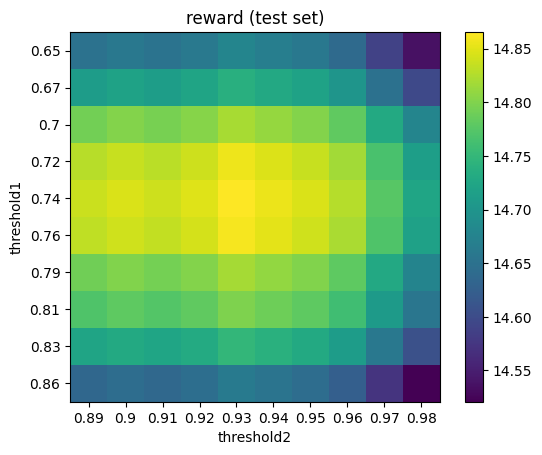

In [37]:
plt.imshow(rewards_all)
plt.xlabel("threshold2")
plt.ylabel("threshold1")
plt.xticks(range(10), threshold2s.round(2))
plt.yticks(range(10), threshold1s.round(2))
plt.colorbar()
plt.title("reward (test set)")
plt.savefig("fig.png")

In [33]:
correct_sft_generated_answer_probs_means = np.e**sft_generated_answer_log_probs_mean[ood_idxs][np.where(sft_generation_categories[ood_idxs, 1]==1)[0]]
wrong_sft_generated_answer_probs_means = np.e**sft_generated_answer_log_probs_mean[ood_idxs][np.where(sft_generation_categories[ood_idxs, 1]==0)[0]]

best_threshold1 = .74
best_threshold2 = .93

commit_correct = (np.where(correct_sft_generated_answer_probs_means>best_threshold2)[0].shape[0])
commit_wrong = (np.where(wrong_sft_generated_answer_probs_means>best_threshold2)[0].shape[0])

hedge_correct = (np.where(np.logical_and(correct_sft_generated_answer_probs_means>best_threshold1, correct_sft_generated_answer_probs_means<best_threshold2))[0].shape[0])
hedge_wrong = (np.where(np.logical_and(wrong_sft_generated_answer_probs_means>best_threshold1, wrong_sft_generated_answer_probs_means<best_threshold2))[0].shape[0])

dont_know_correct = (np.where(correct_sft_generated_answer_probs_means<best_threshold1)[0].shape[0])
dont_know_wrong = (np.where(wrong_sft_generated_answer_probs_means<best_threshold1)[0].shape[0])

total = commit_correct+commit_wrong+hedge_correct+hedge_wrong+dont_know_correct+dont_know_wrong

commmit_correct_percentage = commit_correct/(commit_correct+commit_wrong)
hedge_correct_percentage = hedge_correct/(hedge_correct+hedge_wrong)
dont_know_correct_percentage = dont_know_correct/(dont_know_correct+dont_know_wrong)

# print([commmit_correct_percentage, hedge_correct_percentage, dont_know_correct_percentage])

reward = (30*commit_correct+25.5*hedge_correct+6.5*hedge_wrong+11*(dont_know_correct+dont_know_wrong))/total
print(reward)

15.425974451359318


In [34]:
(commit_correct+commit_wrong)

850

Text(0.5, 1.0, 'OOD')

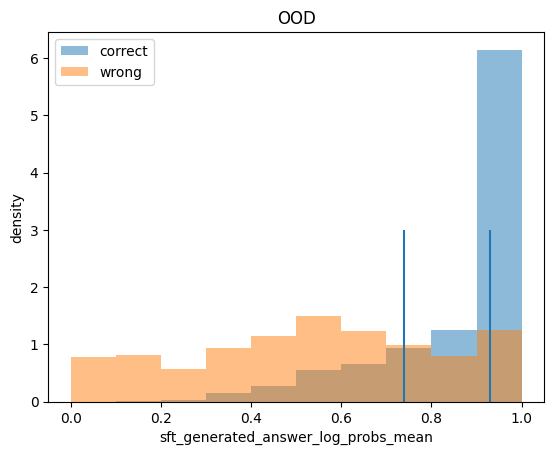

In [36]:
plt.hist(np.e**sft_generated_answer_log_probs_mean[ood_idxs][np.where(sft_generation_categories[ood_idxs, 1]==1)[0]], alpha=0.5, label="correct", density=True, bins=[_*0.1 for _ in range(11)])
plt.hist(np.e**sft_generated_answer_log_probs_mean[ood_idxs][np.where(sft_generation_categories[ood_idxs, 1]==0)[0]], alpha=0.5, label="wrong", density=True, bins=[_*0.1 for _ in range(11)])
plt.legend()
plt.vlines(best_threshold1, 0, 3)
plt.vlines(best_threshold2, 0, 3)
plt.xlabel("sft_generated_answer_log_probs_mean")
plt.ylabel("density")
plt.title("OOD")

# plt.savefig("fig.png")

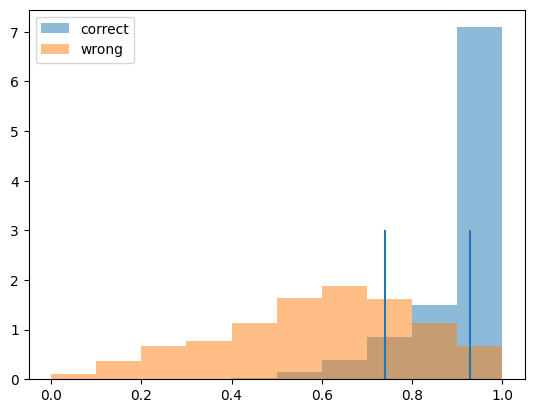

In [5]:
sft_generated_answer_log_probs_mean_train = np.load(sft_model_path+"/generated_answer_log_probs_mean_train.npy")
sft_generation_categories_train = np.load(sft_model_path+"/generation_categories_train.npy")
best_threshold1 = .74
best_threshold2 = .93
correct_sft_generated_answer_probs_means_train = np.e**sft_generated_answer_log_probs_mean_train[np.where(sft_generation_categories_train[:, 1]==1)[0]]
wrong_sft_generated_answer_probs_means_train = np.e**sft_generated_answer_log_probs_mean_train[np.where(sft_generation_categories_train[:, 1]==0)[0]]

plt.hist(correct_sft_generated_answer_probs_means_train, alpha=0.5, label="correct", density=True, bins=[_*0.1 for _ in range(11)])
plt.hist(wrong_sft_generated_answer_probs_means_train, alpha=0.5, label="wrong", density=True, bins=[_*0.1 for _ in range(11)])
plt.legend()
plt.vlines(best_threshold1, 0, 3)
plt.vlines(best_threshold2, 0, 3)


In [6]:

commit_correct = (np.where(correct_sft_generated_answer_probs_means_train>best_threshold2)[0].shape[0])
commit_wrong = (np.where(wrong_sft_generated_answer_probs_means_train>best_threshold2)[0].shape[0])

hedge_correct = (np.where(np.logical_and(correct_sft_generated_answer_probs_means_train>best_threshold1, correct_sft_generated_answer_probs_means_train<best_threshold2))[0].shape[0])
hedge_wrong = (np.where(np.logical_and(wrong_sft_generated_answer_probs_means_train>best_threshold1, wrong_sft_generated_answer_probs_means_train<best_threshold2))[0].shape[0])

dont_know_correct = (np.where(correct_sft_generated_answer_probs_means_train<best_threshold1)[0].shape[0])
dont_know_wrong = (np.where(wrong_sft_generated_answer_probs_means_train<best_threshold1)[0].shape[0])

total = commit_correct+commit_wrong+hedge_correct+hedge_wrong+dont_know_correct+dont_know_wrong

commmit_correct_percentage = commit_correct/(commit_correct+commit_wrong)
hedge_correct_percentage = hedge_correct/(hedge_correct+hedge_wrong)
dont_know_correct_percentage = dont_know_correct/(dont_know_correct+dont_know_wrong)

# print([commmit_correct_percentage, hedge_correct_percentage, dont_know_correct_percentage])

reward = (30*commit_correct+25.5*hedge_correct+6.5*hedge_wrong+11*(dont_know_correct+dont_know_wrong))/total
print(reward)

15.19374932488388


In [7]:
commmit_correct_percentage

0.8778204144282425

In [8]:
hedge_correct_percentage

0.36432748538011694

In [9]:
dont_know_correct_percentage

0.05361353863226522

In [10]:
(commit_correct+hedge_correct)/(commit_correct+commit_wrong+hedge_correct+hedge_wrong)

0.6148259078996631